# Hypothesis Testing with Men's and Women's Soccer Matches

## I. The Context

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

## II. Question

The question is: **Are more goals scored in women's international soccer matches than men's?**

_*assuming that each match is fully independent, i.e., team form is ignored._

## III. Hypothesises

Assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## IV. Exploratory Data Analysis

In [82]:
# Import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import datasets
women_results = pd.read_csv('women_results.csv')
men_results = pd.read_csv('men_results.csv')

In [83]:
def data_info(df):
    temp=pd.DataFrame(index=df.columns)
    temp['total']=[df[i].shape[0] for i in df.columns]
    temp['dtype']=df.dtypes
    temp['#distinct']=[df[i].nunique() for i in df.columns]
    temp['%distinct']=['{:.1f}'.format(df[i].nunique()*100/df.shape[0]) for i in df.columns]
    temp['#null']=df.isna().sum()
    temp['#zero']=[sum(df[i]=='0') for i in df.columns]
    temp['#negative']=[sum(1 for j in df[i] if j<0) if type(df[i].dtypes) in [float,int,complex] else '-' for i in df.columns]
    temp['#empty']=[sum(df[i]=='') for i in df.columns]
    temp['(%)null']=['{:.2f}'.format(num1) if num1 != 0 else '-' for num1 in temp['#null']*100/temp['total']]
    temp['(%)zero']=['{:.2f}'.format(num2) if num2 != 0 else '-' for num2 in temp['#zero']*100/temp['total']]
    temp['(%)negative']=['{:.2f}'.format(num3) if num3 != 0 else '-' for num3 in temp['#empty']*100/temp['total']]
    temp['(%)empty']=['{:.2f}'.format(num4) if num4 != 0 else '-' for num4 in
    temp['#empty']*100/temp['total']]
    return temp

### 1. Women dataset

In [84]:
# EDA: the women dataset
women_results.describe()

,Unnamed: 0,home_score,away_score
count,4884.000000,4884.000000,4884.000000
mean,2441.500000,2.272727,1.431409
std,1410.033688,2.736377,1.974651
min,0.000000,0.000000,0.000000
25%,1220.750000,0.000000,0.000000
50%,2441.500000,1.000000,1.000000
75%,3662.250000,3.000000,2.000000
max,4883.000000,24.000000,24.000000


In [85]:
data_info(women_results)

,total,dtype,#distinct,%distinct,#null,#zero,#negative,#empty,(%)null,(%)zero,(%)negative,(%)empty
Unnamed: 0,4884,int64,4884,100.0,0,0,-,0,-,-,-,-
date,4884,object,1931,39.5,0,0,-,0,-,-,-,-
home_team,4884,object,198,4.1,0,0,-,0,-,-,-,-
away_team,4884,object,196,4.0,0,0,-,0,-,-,-,-
home_score,4884,int64,22,0.5,0,0,-,0,-,-,-,-
away_score,4884,int64,19,0.4,0,0,-,0,-,-,-,-
tournament,4884,object,30,0.6,0,0,-,0,-,-,-,-


### 2. Men dataset

In [86]:
# EDA: the men dataset
men_results.describe()

,Unnamed: 0,home_score,away_score
count,44353.000000,44353.000000,44353.000000
mean,22176.000000,1.740559,1.178793
std,12803.752581,1.748722,1.394580
min,0.000000,0.000000,0.000000
25%,11088.000000,1.000000,0.000000
50%,22176.000000,1.000000,1.000000
75%,33264.000000,2.000000,2.000000
max,44352.000000,31.000000,21.000000


In [87]:
data_info(men_results)

,total,dtype,#distinct,%distinct,#null,#zero,#negative,#empty,(%)null,(%)zero,(%)negative,(%)empty
Unnamed: 0,44353,int64,44353,100.0,0,0,-,0,-,-,-,-
date,44353,object,15547,35.1,0,0,-,0,-,-,-,-
home_team,44353,object,311,0.7,0,0,-,0,-,-,-,-
away_team,44353,object,306,0.7,0,0,-,0,-,-,-,-
home_score,44353,int64,26,0.1,0,0,-,0,-,-,-,-
away_score,44353,int64,22,0.0,0,0,-,0,-,-,-,-
tournament,44353,object,141,0.3,0,0,-,0,-,-,-,-


## V. Filtering datasets

In [88]:
# Filter datasets
women_filtered['date'] = pd.to_datetime(women_filtered['date'])
women_filtered = women_results[(women_results['tournament']=='FIFA World Cup') & (women_results['date'] > '2002-01-01')]

men_filtered['date'] = pd.to_datetime(men_filtered['date'])
men_filtered = men_results[(men_results['tournament']=='FIFA World Cup') & (men_results['date'] > '2002-01-01')]

In [89]:
women_filtered.sort_values(by='date').head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


## VI. Manipulating data

In [90]:
# Create a gendeer column
women_filtered['group'] = ['women']*women_filtered.shape[0]
men_filtered['group'] = ['men']*men_filtered.shape[0]

# Concatenate two datasets
df = pd.concat([women_filtered, men_filtered], axis=0, ignore_index=True)

# Drop 'Unnamed: 0' column
df.drop(columns='Unnamed: 0', inplace=True)

# Create a column calculating the total goals per match
df['total_score'] = df['home_score'] + df['away_score']

In [91]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,group,total_score
0,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
2,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
3,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
4,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


## VII. Hypothesis Test

### 1. Choosing the test

Hypothesises with  a 10% significance level:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

**1.1. Explanation for choosing unpaired two-sample test:**
- Unpaired and two-sample: Comparing the mean of two independent groups (men's and women's)
- Type of data (goals) is numeric (discrete)

Test suggestions:
- A parametric test: **t-test**
- A non-parametric test: **Mann-Whitney test**

To determine which test is appropriate, **checking sample size in each group** & **checking the normality of each distribution** are required.

**1.2. Checking the normality of `total_score`**

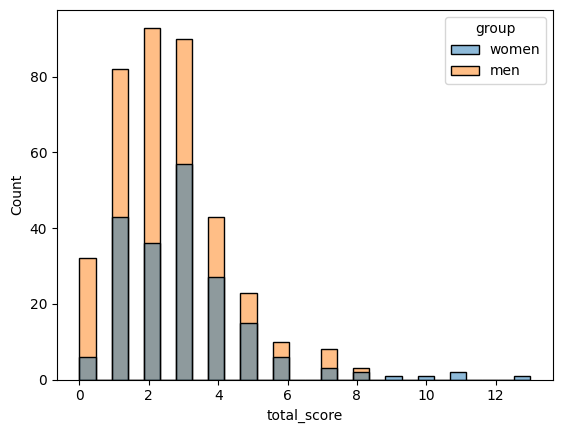

In [92]:
sns.histplot(data=df, x='total_score', hue='group')
plt.show()

**Findings**: The distribution is obviously not normally distributed because it seems not likely symmetric bell-shaped curve with a long right tail and many outliers.

To confirm the findings, the normality test will be performed: 

In [93]:
import pingouin
pingouin.normality(data=df, dv='total_score', group='group', method='shapiro', alpha=0.05)

,W,pval,normal
group,,,
women,0.849101,3.890520e-13,False
men,0.926649,8.894154e-13,False


With p-value = 0, the null hypothesis is rejected. In the other words, the total score per match in the concatenated dataset is not normally distributed.

**Conclusion: Mann-Whitney Test is appropriate.**

### 2. Performing the Mann-Whitney test

**2.1. Using pingouin**

In [96]:
print(df.groupby('group')['total_score'].agg({'mean','count'}))

# Select the total scores of women's
women_sample = df[df['group']=='women']['total_score']
men_sample = df[df['group']=='men']['total_score']

# Run the test
mwu_test = pingouin.mwu(x = women_sample,
                        y = men_sample,
                       alternative='greater')
print(mwu_test)

# Extract the p-value
p_val = mwu_test['p-val'].values[0]

if p_val <= 0.1:
    result = 'reject'
else:
    result = 'fail to reject'

# Create the result in a dict
result_dict = {"p_val":p_val, "result":result}
print('\n', result_dict)

           mean  count
group                 
men    2.513021    384
women  2.980000    200
       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451

 {'p_val': 0.005106609825443641, 'result': 'reject'}
